# Prediction of Rock and Mines in Submarrins 


In [1]:
#Importing Files
from sklearn.linear_model import LogisticRegression
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score , confusion_matrix
import seaborn as sns


In [2]:
data =pd.read_csv(r'D:\Visual Studio Code\ML\DataSet\sonar.csv',header=None)


In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
data.shape

(208, 61)

In [5]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [6]:
data[60].value_counts()
#Mines ---> M
#Rocks ---> R

60
M    111
R     97
Name: count, dtype: int64

In [7]:
data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [8]:
#Spliting the data in X and Y variable and spliting it into train and test
x = data.drop(columns= 60,axis=1)
y=data[60]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,stratify=y,random_state=1)

In [9]:
#Calling Logistic Regression and fit dataset in this
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [10]:
#Now making prediction and finding accuracy score for
y_pred_testing = model.predict(x_test)
accuracy = accuracy_score(y_pred_testing,y_test)
print('Accuracy Score testing data: ', accuracy)

Accuracy Score testing data:  0.7619047619047619


In [11]:
y_pred_training = model.predict(x_train)
accuracy = accuracy_score(y_pred_training,y_train)
print('Accuracy Score training data: ', accuracy)

Accuracy Score training data:  0.8342245989304813


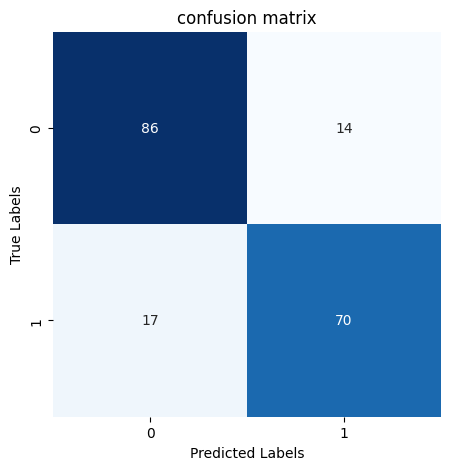

In [12]:
#Making confusion matrix of Training dataset
cm = confusion_matrix(y_train,y_pred_training)
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,cmap ='Blues',fmt = 'g', cbar =False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('confusion matrix')
plt.show()

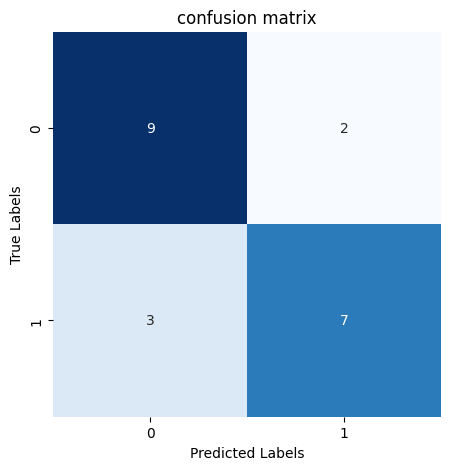

In [13]:
#Making confusion matrix of Testing dataset
cm = confusion_matrix(y_test,y_pred_testing)
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,cmap ='Blues',fmt = 'g', cbar =False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('confusion matrix')
plt.show()

In [14]:
input_data =(0.0192,0.0607,0.0378,0.0774,0.1388,0.0809,0.0568,0.0219,0.1037,0.1186,0.1237,0.1601,0.3520,0.4479,0.3769,0.5761,0.6426,0.6790,0.7157,0.5466,0.5399,0.6362,0.7849,0.7756,0.5780,0.4862,0.4181,0.2457,0.0716,0.0613,0.1816,0.4493,0.5976,0.3785,0.2495,0.5771,0.8852,0.8409,0.3570,0.3133,0.6096,0.6378,0.2709,0.1419,0.1260,0.1288,0.0790,0.0829,0.0520,0.0216,0.0360,0.0331,0.0131,0.0120,0.0108,0.0024,0.0045,0.0037,0.0112,0.0075)

#Change the input data into an array
input_data = np.asarray(input_data)

#Changing the shape of data so that we can make prediction on that
input_data_reshaped = input_data.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

if (prediction[0] == 'R'):
    print("The object is a Rock")
else:
    print("The object is a Mine")

The object is a Rock
